# Causal Discovery Algorithms

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder

DATA_PATH = "/home/decaro/xai-hack/data/credit_card_churn.csv"
RANDOM_STATE = 42
MAX_ITER = 100

# Seed everything for reproducibility
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)


df = pd.read_csv(DATA_PATH)
df.head()

df_vanilla = df.copy()

le_Education_Level = LabelEncoder()
le_Gender = LabelEncoder()
le_Income_Category = LabelEncoder()
le_Card_Category = LabelEncoder()
le_Marital_Status = LabelEncoder()

df['Education_Level_n'] = le_Education_Level.fit_transform(df['Education_Level'])
df['Income_Category_n'] = le_Income_Category.fit_transform(df['Income_Category'])
df['Card_Category_n'] = le_Card_Category.fit_transform(df['Card_Category'])
df['Gender_n'] = le_Gender.fit_transform(df['Gender'])
df['Marital_Status_n'] = le_Marital_Status.fit_transform(df['Marital_Status'])
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
df = df.drop([ 'Education_Level',  'Income_Category', 'Card_Category','CLIENTNUM', 'Gender', 'Marital_Status'], axis = 1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_n,Income_Category_n,Card_Category_n,Gender_n,Marital_Status_n
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3,2,0,1,1
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2,4,0,0,2
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2,3,0,1,1
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,3,4,0,0,3
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,5,2,0,1,1


/home/decaro/.conda/envs/xaihack/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/decaro/.conda/envs/xaihack/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.336e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(


[[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]]
[np.int64(8), np.int64(9), np.int64(7), np.int64(0), np.int64(2), np.int64(4), np.int64(5), np.int64(10), np.int64(13), np.int64(14), np.in

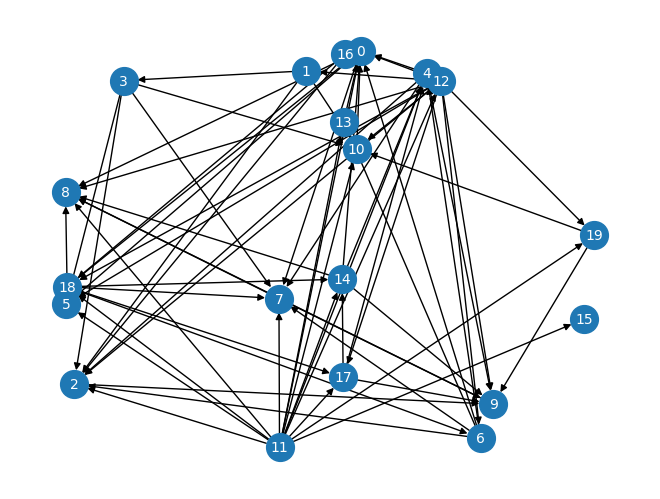

In [2]:
X = df.to_numpy()
X.shape

from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM(RANDOM_STATE, MAX_ITER)
model.fit(X)

# Numpy print only two decimal places
with np.printoptions(precision=2):
    print((np.abs(model.adjacency_matrix_) > 0).astype(int))
    print(model.causal_order_)

# Visualize the graph with name of the features
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph(model.adjacency_matrix_)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=400, font_size=10, font_color='white')
plt.show()

In [3]:
# Print the columns with their respective indices
for i, col in enumerate(df.columns):
    print(i, col)

0 Attrition_Flag
1 Customer_Age
2 Dependent_count
3 Months_on_book
4 Total_Relationship_Count
5 Months_Inactive_12_mon
6 Contacts_Count_12_mon
7 Credit_Limit
8 Total_Revolving_Bal
9 Avg_Open_To_Buy
10 Total_Amt_Chng_Q4_Q1
11 Total_Trans_Amt
12 Total_Trans_Ct
13 Total_Ct_Chng_Q4_Q1
14 Avg_Utilization_Ratio
15 Education_Level_n
16 Income_Category_n
17 Card_Category_n
18 Gender_n
19 Marital_Status_n
